**importing libraries**

In [1]:
from keras.datasets import mnist
import numpy as np
from keras.utils import to_categorical
import tensorflow as tf
from keras.models import Sequential #arranging the latyer in sequential order
from keras .layers import Conv2D, MaxPool2D, Flatten, Dense
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from sklearn.model_selection import KFold



In [2]:
# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss',min_delta=0.001,restore_best_weights=True, patience=10, verbose=1, mode='auto')


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],X_train.shape[2],1))# reshaping the data into single channel 


In [5]:
X_test=X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))



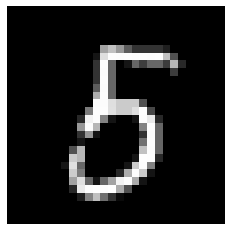

In [6]:
plt.axis('off')
plt.imshow(X_test[45], cmap='gray')
plt.show()

In [7]:
X_train = X_train / 255
X_test = X_test/ 255  #normalization of pixel value pixel value is in range 0 to 255 by deving max range
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [8]:
#One hot encoding target values
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [10]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation ='relu', input_shape=(28,28,1)))    # , 32 is face ,3,3 is kernal size or filter, 1 for greyscale 
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax')) #output layer as multiclass classification softmax is used , output 0 to 9= 10'''



In [12]:
#compile model  
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])


In [13]:
history=model.fit(X_train , y_train ,validation_data = (X_test,y_test),epochs=5,batch_size=32, callbacks=[early_stop])

Epoch 1/5
1875/1875 [==============================] - 27s 13ms/step - loss: 0.1622 - acc: 0.9516 - val_loss: 0.0659 - val_acc: 0.9780
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0551 - acc: 0.9832 - val_loss: 0.0544 - val_acc: 0.9818
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0363 - acc: 0.9887 - val_loss: 0.0512 - val_acc: 0.9828
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0257 - acc: 0.9923 - val_loss: 0.0412 - val_acc: 0.9880
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0168 - acc: 0.9947 - val_loss: 0.0457 - val_acc: 0.9862


In [14]:
#Evaluate the Model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 2s 7ms/step - loss: 0.0457 - acc: 0.9862
Accuracy: 98.62


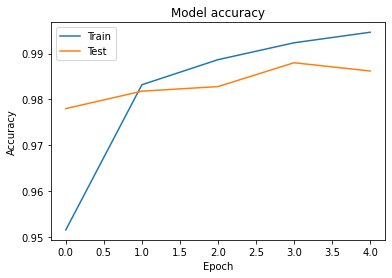

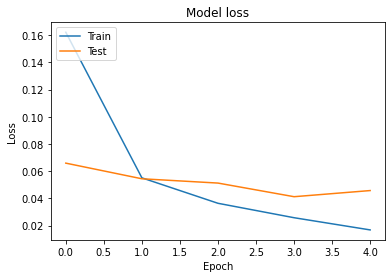

In [15]:
#Graphical Representation of Accuracy & Loss Graph
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [16]:
#Save Model
''''model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")'''

Saved model to disk
